In [23]:
import os
from googleapiclient.discovery import build
from google.oauth2.service_account import Credentials
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
SERVICE_ACCOUNT_FILE ='marine-guard-442216-f5-35b478f539ff.json'
SCOPES = os.getenv('GOOGLE_SCOPES', 'https://www.googleapis.com/auth/spreadsheets.readonly').split(',')

credentials = Credentials.from_service_account_file(
    SERVICE_ACCOUNT_FILE, scopes=SCOPES)

In [25]:
SPREADSHEET_ID = os.getenv('SPREADSHEET_ID') # SPREADSHEET_ID=1pGHTCCKlJoapYVqahkLUD3E0f2jo-vQXFRH-N4f6OIY
RANGE_NAME = os.getenv('RANGE_NAME') # RANGE_NAME=SQL DDL Quiz Questions!J:O
service = build('sheets', 'v4', credentials=credentials)
sheet = service.spreadsheets()

In [26]:
result = sheet.values().get(spreadsheetId=SPREADSHEET_ID, range=RANGE_NAME).execute()
rows = result.get('values', [])

In [22]:
rows

[['Post Date',
  'Posting Status',
  'Platform',
  'Impressions',
  'Vote',
  'Engagement rate'],
 ['01-Nov-2024', 'Posted', 'Linkedin, Youtube', '657', '58', '8.83%'],
 ['02-Nov-2024', 'Posted', 'Linkedin, Youtube', '366', '17', '5.48%'],
 ['03-Nov-2024', 'Posted', 'Linkedin, Youtube', '922', '50', '5.42%'],
 ['04-Nov-2024', 'Posted', 'Linkedin, Youtube', '895', '54', '6.03%'],
 [],
 ['05-Nov-2024', 'Posted', 'Linkedin, Youtube', '795', '48', '6.09%'],
 ['06-Nov-2024', 'Posted', 'Linkedin, Youtube', '417', '25', '6.00%'],
 ['07-Nov-2024', 'Posted', 'Linkedin, Youtube', '582', '35', '6.01%'],
 ['08-Nov-2024', 'Posted', 'Linkedin, Youtube', '736', '39', '5.30%'],
 ['09-Nov-2024', 'Posted', 'Linkedin, Youtube', '465', '28', '6.02%'],
 ['10-Nov-2024', 'Posted', 'Linkedin, Youtube', '638', '38', '5.96%'],
 ['11-Nov-2024', 'Posted', 'Linkedin, Youtube', '496', '25', '5.04%'],
 ['12-Nov-2024', 'Posted', 'Linkedin, Youtube', '757', '59', '7.79%'],
 ['13-Nov-2024', 'Posted', 'Linkedin, Youtube

In [27]:
if rows:
    headers = rows[0]
    data = pd.DataFrame(rows[1:], columns=headers)
    data['Post Date'] = pd.to_datetime(data['Post Date'], format='%d-%b-%Y')
    data['Impressions'] = pd.to_numeric(data['Impressions'])
    data['Vote'] = pd.to_numeric(data['Vote'])

In [23]:
data

,Post Date,Posting Status,Platform,Impressions,Vote,Engagement rate
0,2024-11-01,Posted,"Linkedin, Youtube",657.0,58.0,8.83%
1,2024-11-02,Posted,"Linkedin, Youtube",366.0,17.0,5.48%
2,2024-11-03,Posted,"Linkedin, Youtube",922.0,50.0,5.42%
3,2024-11-04,Posted,"Linkedin, Youtube",895.0,54.0,6.03%
4,NaT,None,None,NaN,NaN,None
5,2024-11-05,Posted,"Linkedin, Youtube",795.0,48.0,6.09%
6,2024-11-06,Posted,"Linkedin, Youtube",417.0,25.0,6.00%
7,2024-11-07,Posted,"Linkedin, Youtube",582.0,35.0,6.01%
8,2024-11-08,Posted,"Linkedin, Youtube",736.0,39.0,5.30%
9,2024-11-09,Posted,"Linkedin, Youtube",465.0,28.0,6.02%


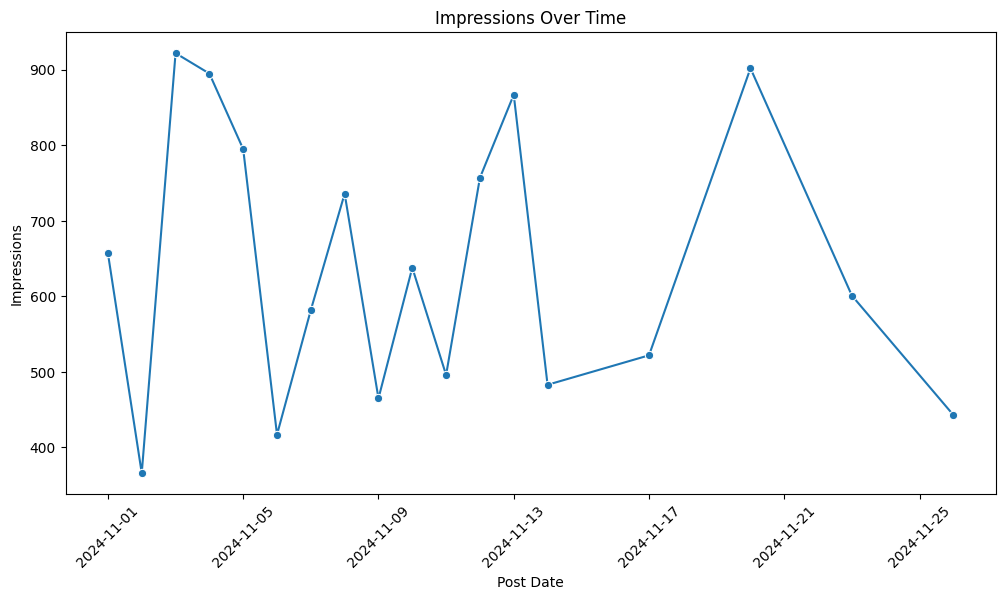

In [25]:
#  Impressions vs Post Date Graph
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x="Post Date", y="Impressions", marker='o')
plt.title("Impressions Over Time")
plt.xlabel("Post Date")
plt.ylabel("Impressions")
plt.xticks(rotation=45)
plt.show()

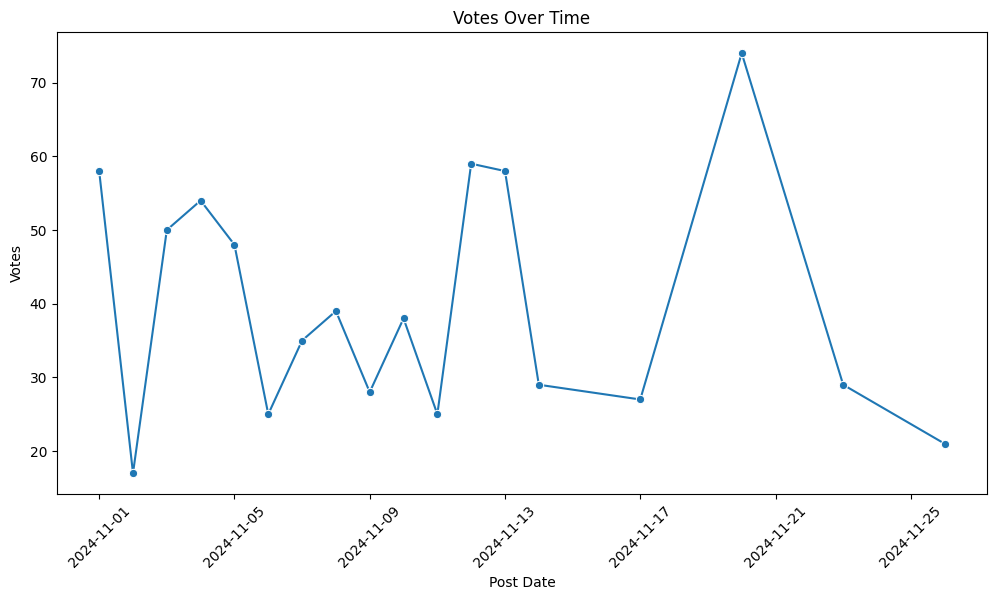

In [27]:
# Vote vs Post Date Graph
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x="Post Date", y="Vote", marker='o')
plt.title("Votes Over Time")
plt.xlabel("Post Date")
plt.ylabel("Votes")
plt.xticks(rotation=45)
plt.show()

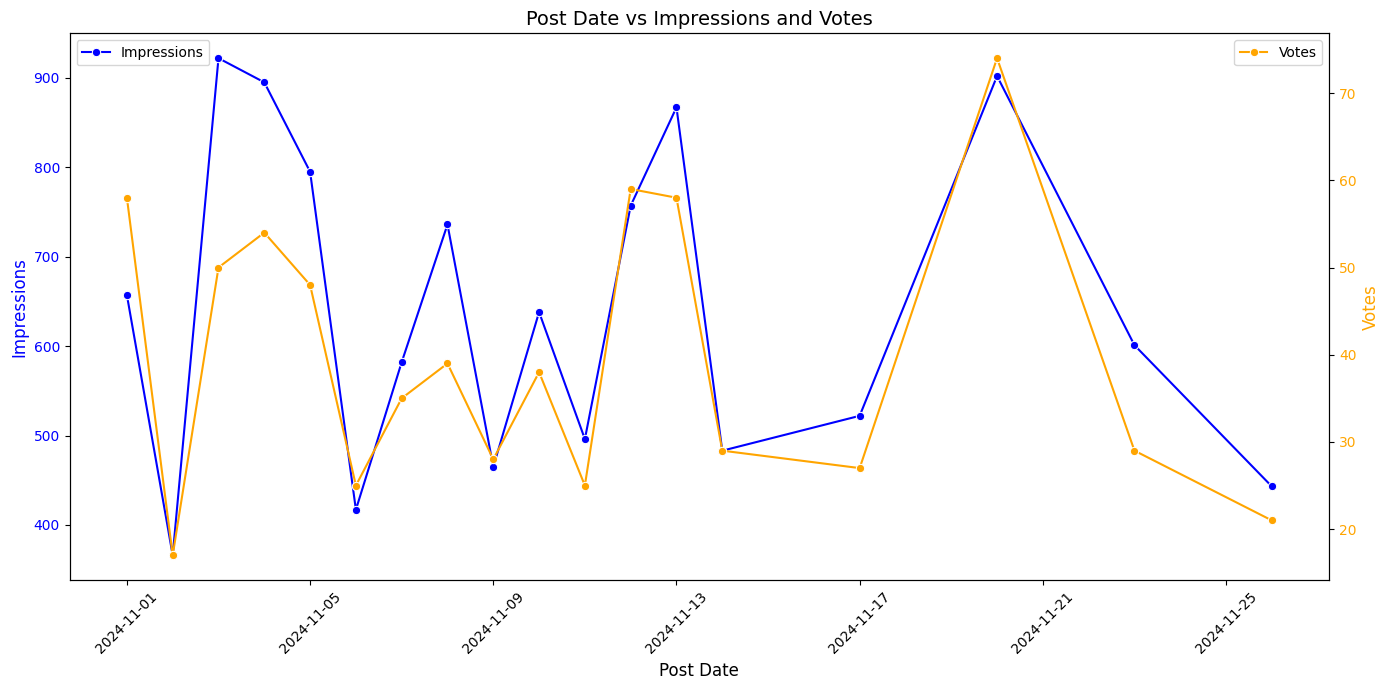

In [6]:
plt.figure(figsize=(14, 7))

# Create the first axis for Impressions
ax1 = sns.lineplot(data=data, x="Post Date", y="Impressions", marker='o', label="Impressions", color="blue")
ax1.set_ylabel("Impressions", fontsize=12, color="blue")
ax1.tick_params(axis='y', labelcolor="blue")
ax1.set_xlabel("Post Date", fontsize=12)
ax1.set_title("Post Date vs Impressions and Votes", fontsize=14)
plt.xticks(rotation=45)

# Create the second axis for Votes
ax2 = ax1.twinx()  # Instantiate a second y-axis sharing the same x-axis
sns.lineplot(data=data, x="Post Date", y="Vote", marker='o', label="Votes", color="orange", ax=ax2)
ax2.set_ylabel("Votes", fontsize=12, color="orange")
ax2.tick_params(axis='y', labelcolor="orange")

# Add legends for both plots
ax1.legend(loc="upper left", fontsize=10)
ax2.legend(loc="upper right", fontsize=10)

plt.tight_layout()
plt.show()


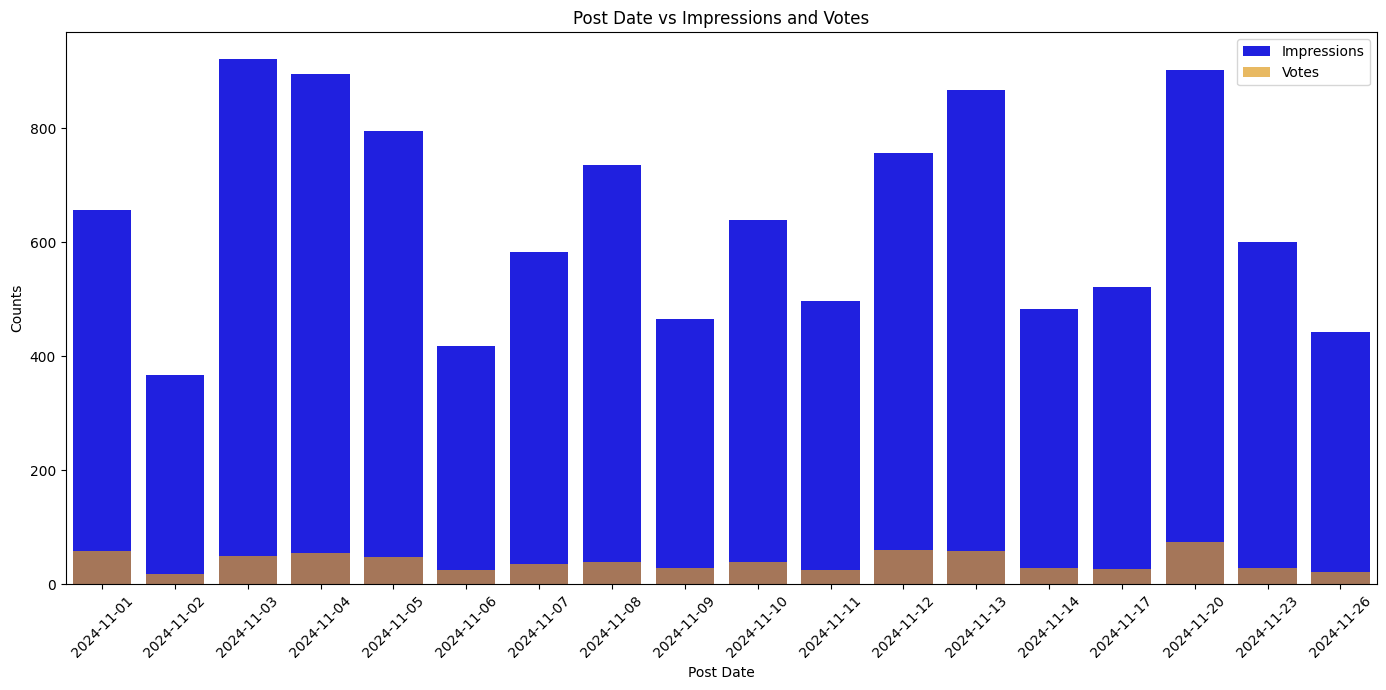

In [ ]:
# bar plot
plt.figure(figsize=(14, 7))
sns.barplot(data=data, x="Post Date", y="Impressions", color="blue", label="Impressions")
sns.barplot(data=data, x="Post Date", y="Vote", color="orange", label="Votes", alpha=0.7)
plt.title("Post Date vs Impressions and Votes")
plt.xlabel("Post Date")
plt.ylabel("Counts")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


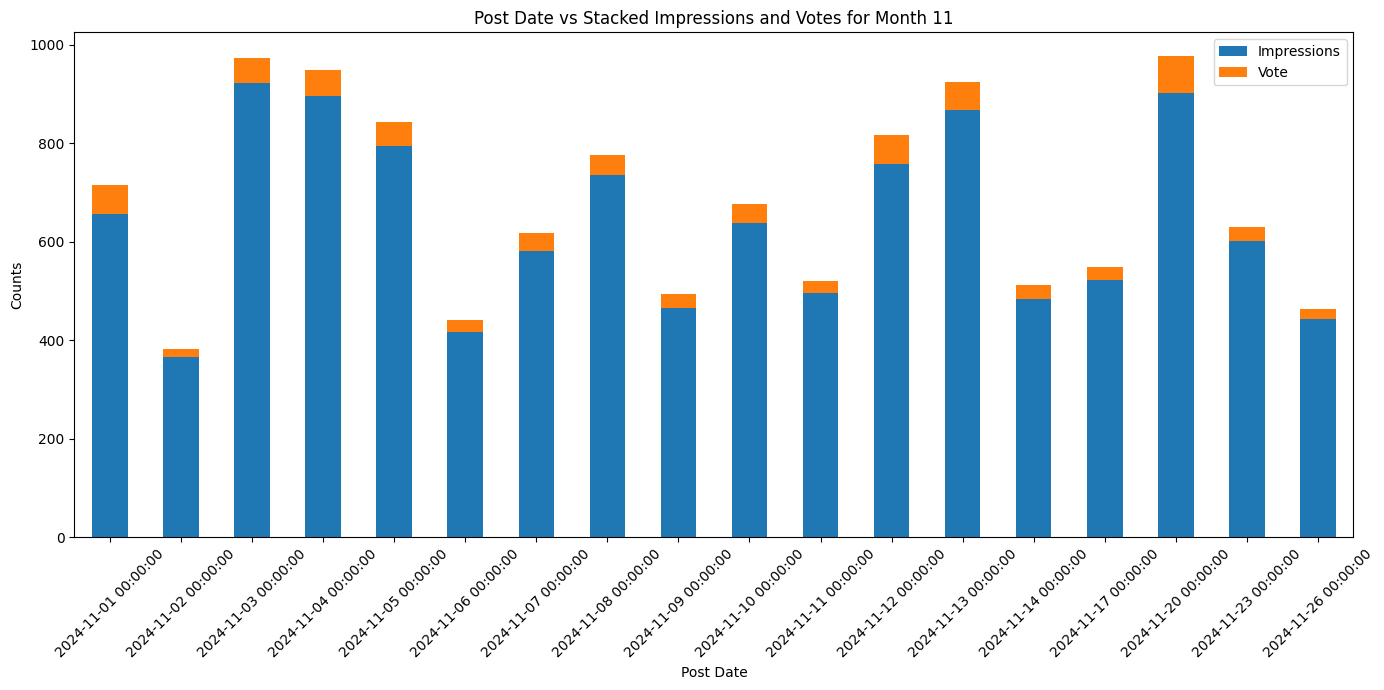

In [29]:
# Ensure the 'Post Date' column is in datetime format
data['Post Date'] = pd.to_datetime(data['Post Date'], errors='coerce')

# Function to filter and plot data for a specific month
def plot_monthly_data(data, month):
    # Filter data for the given month
    filtered_data = data[data['Post Date'].dt.month == month]
    
    # Group and aggregate data
    data_grouped = filtered_data.groupby('Post Date').sum()
    
    # Plot the data
    data_grouped[['Impressions', 'Vote']].plot(kind='bar', stacked=True, figsize=(14, 7))
    plt.title(f"Post Date vs Stacked Impressions and Votes for Month {month}")
    plt.xlabel("Post Date")
    plt.ylabel("Counts")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Call the function for November (month=11)
plot_monthly_data(data, month=11)

# Call the function for December (month=12) if needed
# plot_monthly_data(data, month=12)

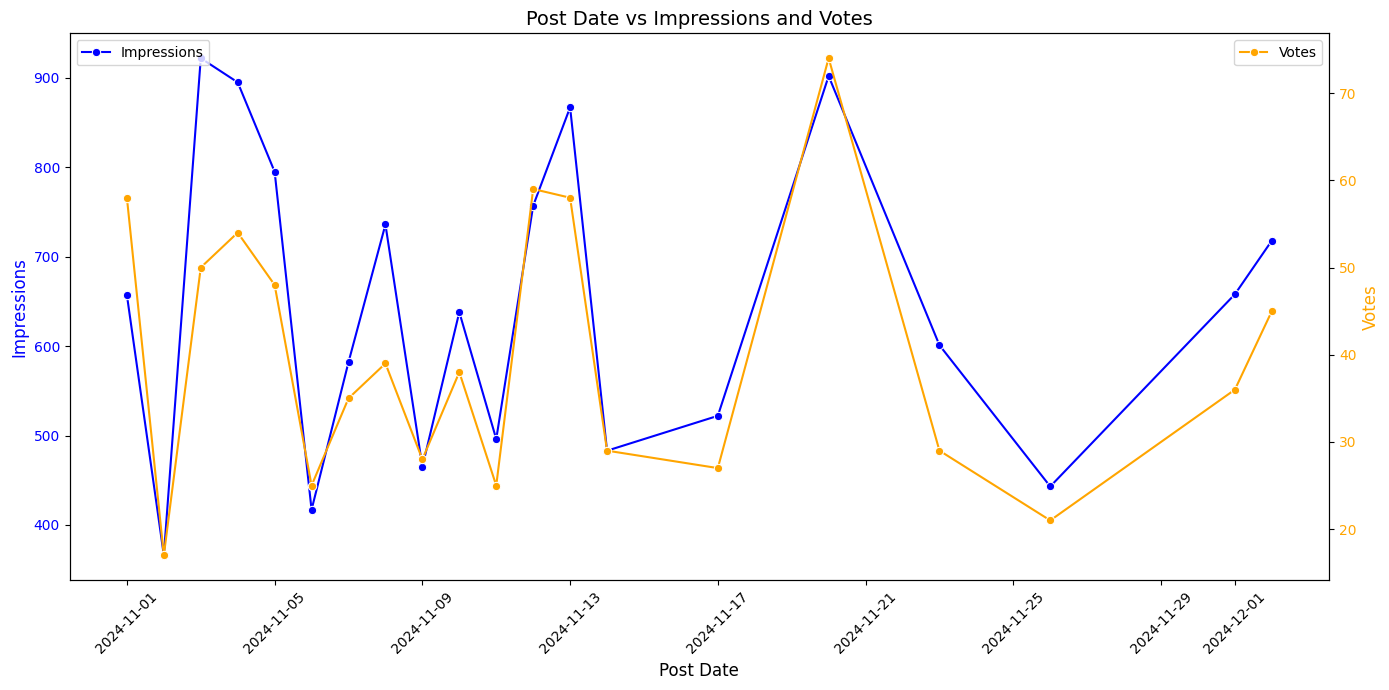

In [30]:
# Define a function to handle mouse motion events
def on_hover(event):
    if event.inaxes is not None:  # Ensure the hover happened within an axis
        x_value = event.xdata  # X-axis value (Post Date)
        y_value1 = ax1.get_lines()[0].get_ydata()  # Y-values for Impressions
        y_value2 = ax2.get_lines()[0].get_ydata()  # Y-values for Votes
        
        # Find the closest data point to the mouse position
        closest_idx = (abs(data['Post Date'] - x_value)).argmin()
        x_closest = data['Post Date'].iloc[closest_idx]
        y_closest1 = y_value1[closest_idx]
        y_closest2 = y_value2[closest_idx]
        
        # Update the annotation text to display the values
        annotation.set_text(f"Post Date: {x_closest}\nImpressions: {y_closest1:.2f}\nVotes: {y_closest2:.2f}")
        annotation.set_position((x_value, (y_closest1 + y_closest2) / 2))  # Position annotation at the average of the y-values

        # Redraw the canvas to update the annotation
        plt.draw()

# Create a figure and axis
plt.figure(figsize=(14, 7))

# Create the first axis for Impressions
ax1 = sns.lineplot(data=data, x="Post Date", y="Impressions", marker='o', label="Impressions", color="blue")
ax1.set_ylabel("Impressions", fontsize=12, color="blue")
ax1.tick_params(axis='y', labelcolor="blue")
ax1.set_xlabel("Post Date", fontsize=12)
ax1.set_title("Post Date vs Impressions and Votes", fontsize=14)
plt.xticks(rotation=45)

# Create the second axis for Votes
ax2 = ax1.twinx()  # Instantiate a second y-axis sharing the same x-axis
sns.lineplot(data=data, x="Post Date", y="Vote", marker='o', label="Votes", color="orange", ax=ax2)
ax2.set_ylabel("Votes", fontsize=12, color="orange")
ax2.tick_params(axis='y', labelcolor="orange")

# Add legends for both plots
ax1.legend(loc="upper left", fontsize=10)
ax2.legend(loc="upper right", fontsize=10)

# Create an annotation object (initially empty)
annotation = ax1.annotate('', xy=(0, 0), xytext=(0, 0), textcoords="offset points",
                          bbox=dict(boxstyle="round,pad=0.3", fc="yellow", alpha=0.5),
                          arrowprops=dict(arrowstyle="->", color="red"), fontsize=12, color='black')

# Connect the hover event to the function
plt.gcf().canvas.mpl_connect('motion_notify_event', on_hover)

# Display the plot
plt.tight_layout()
plt.show()
